<a href="https://colab.research.google.com/github/riddhigarg2605/cureya_tasks/blob/main/Week2_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Detection Models**



**importing the csv and libraries**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
import pandas as pd
heart = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Performing analysis**

In [ ]:
import matplotlib.pyplot as plt

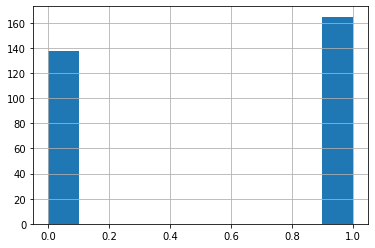

In [ ]:
heart['target'].hist() #visualizing anomalies vs normal
plt.rcParams['figure.figsize'] = (6, 4)

In [ ]:
import seaborn as sns

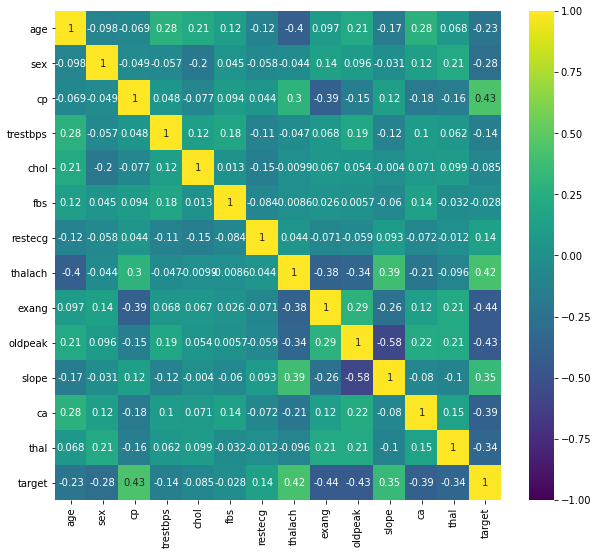

In [265]:
plt.rcParams['figure.figsize'] = (10, 9) #visualizing correlation between all the features
sns.heatmap(heart.corr(),annot = True,  cmap = "viridis", vmin = -1, vmax = 1, center = 0)

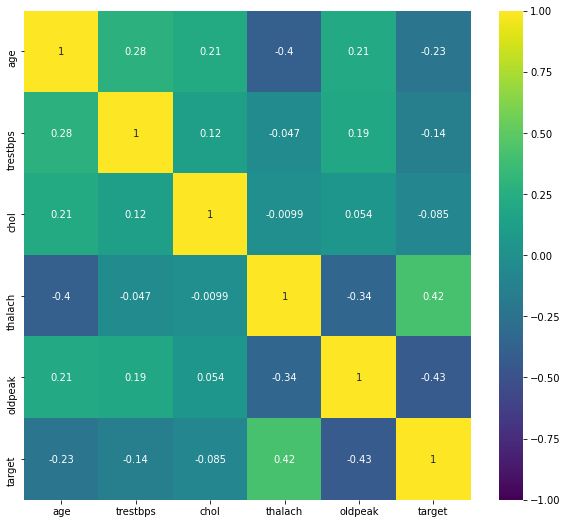

In [ ]:
plt.rcParams['figure.figsize'] = (10, 9)
sns.heatmap(data = heart.drop(['sex', 'cp', 'ca', 'fbs', 'restecg', 'exang', 'slope', 'thal'], axis  = 1).corr(), 
            annot = True,  cmap = "viridis", vmin = -1, vmax = 1, center = 0)   #visualizing correlation between non categorical features

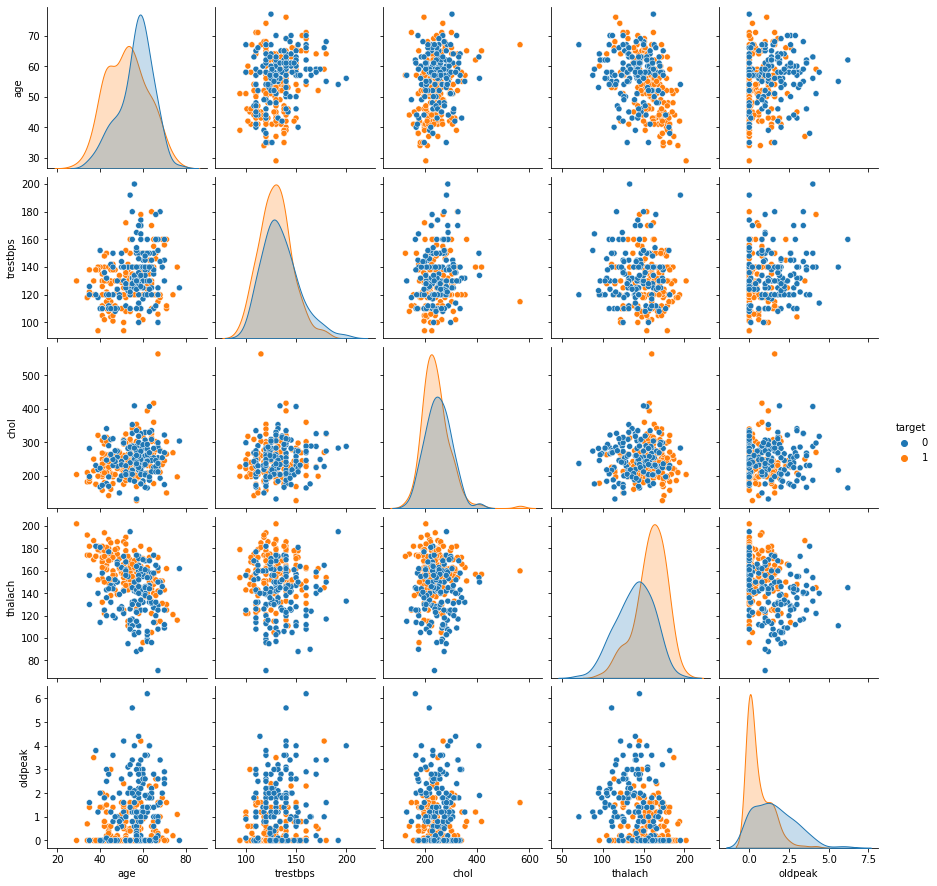

In [ ]:
sns.pairplot(data = heart.drop(['sex', 'cp', 'ca', 'fbs', 'restecg', 'exang', 'slope', 'thal'], axis  = 1), hue = 'target') #for non categorical features

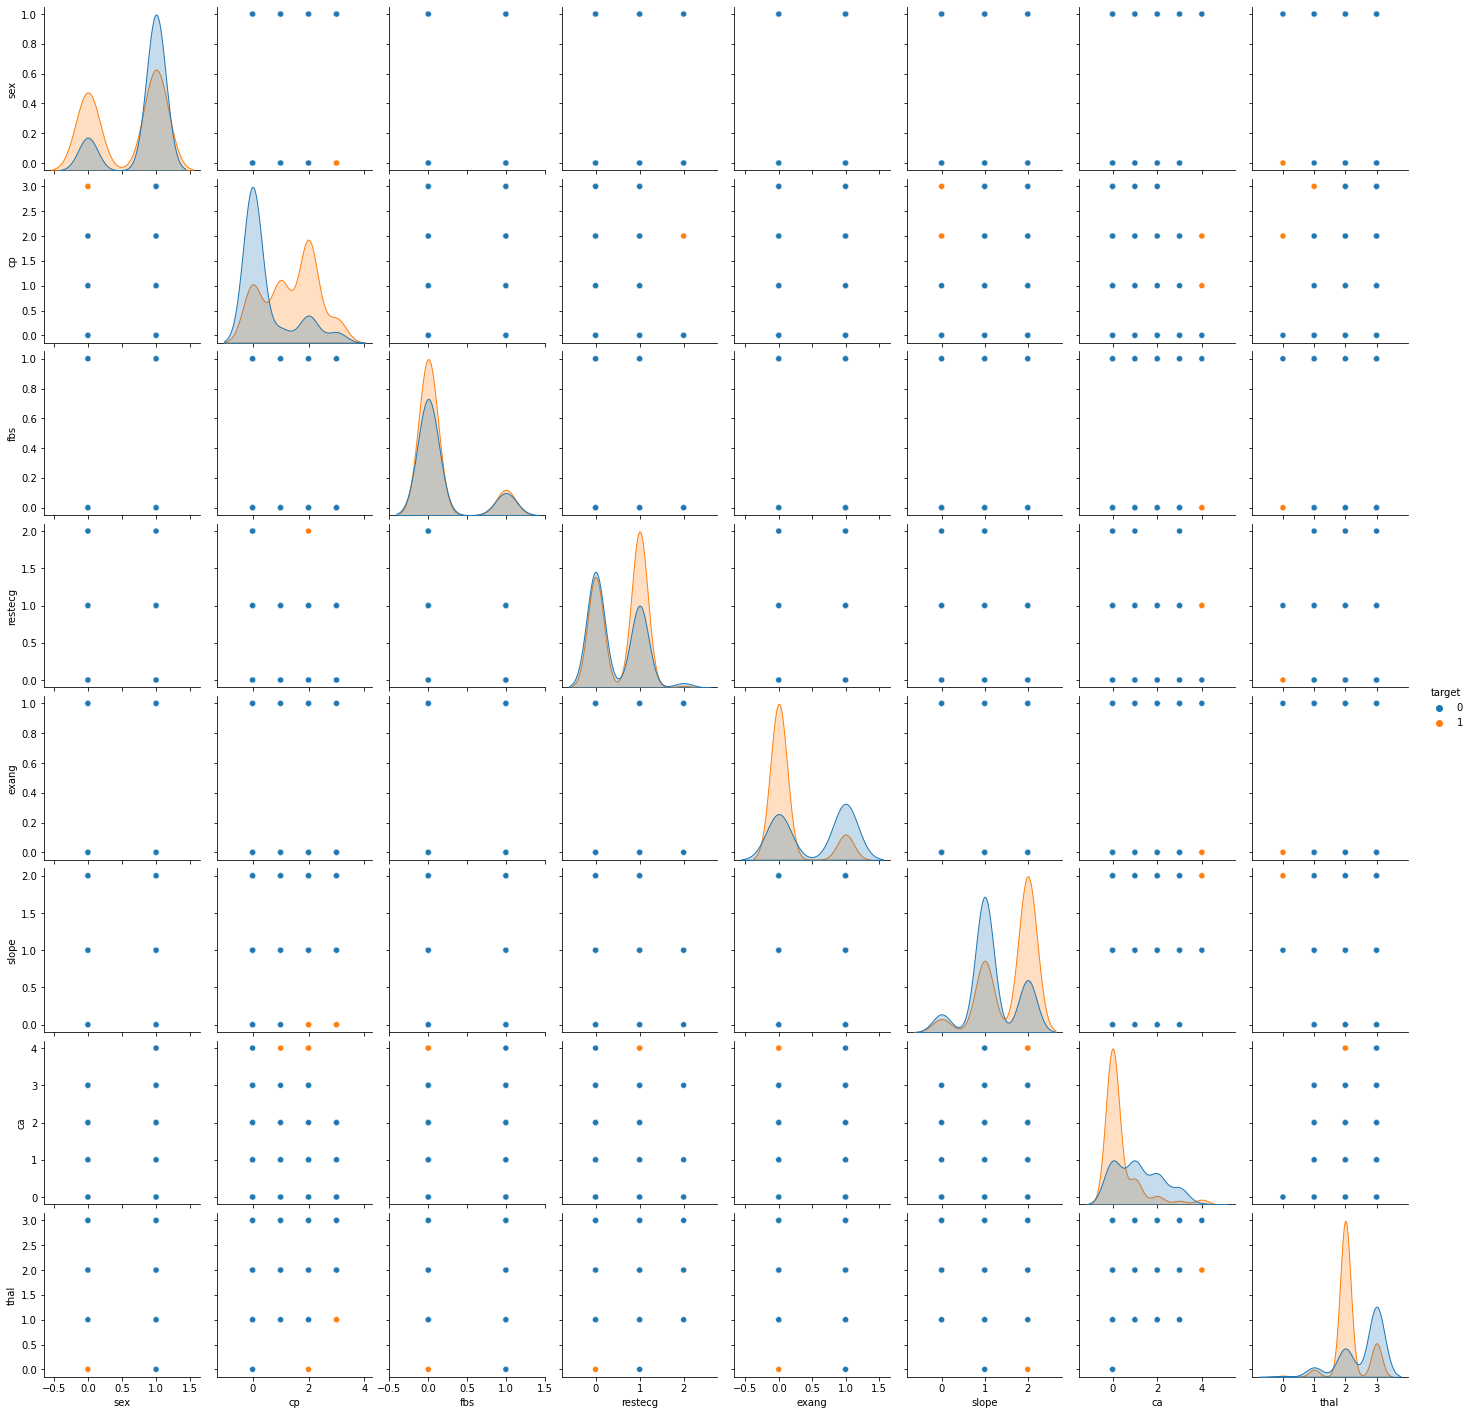

In [ ]:
plt.rcParams['figure.figsize'] = (10, 9)
sns.pairplot(data = heart.drop(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], axis  = 1), hue = 'target') #for categorical features

Text(0.5, 1.0, 'Gender distibution of people not having heart disease')

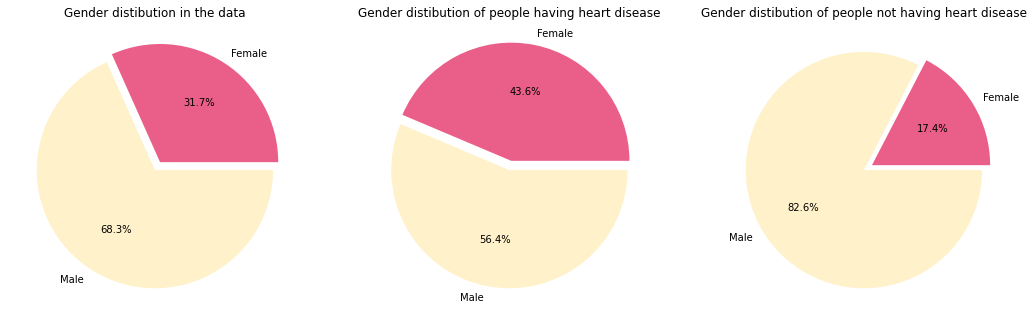

In [302]:
plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(131)
plt.pie(heart.groupby(['sex']).sex.count().to_list(), labels = ["Female","Male"], autopct='%1.1f%%', colors=['#EA5F89','#FFF1C9'], explode=(0.08,0))
plt.title("Gender distibution in the data")

plt.subplot(132)
plt.pie(heart.loc[heart.target == 1].groupby(['sex']).sex.count().to_list(),
        labels = ["Female", "Male"], autopct='%1.1f%%', colors=['#EA5F89', '#FFF1C9'], explode=(0.08,0))
plt.title("Gender distibution of people having heart disease")

plt.subplot(133)
plt.pie(heart.loc[heart.target == 0].groupby(['sex']).sex.count().to_list(),
        labels = ["Female", "Male"], autopct='%1.1f%%', colors=['#EA5F89', '#FFF1C9'], explode=(0.08,0))
plt.title("Gender distibution of people not having heart disease") #It can be observed that women suffer from heart diseases more often than man

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [180]:
X_train,X_test,y_train,y_test=train_test_split(heart.drop(labels=['target'], axis=1),
    heart['target'],
    test_size=0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Mutual Information
Since we are using mutual information, we can skip the one-hot encoding to tempoararily see how the results are. If the models are accurate then one hot encoding for all the categorical variables is not required.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determining the mutual information for train
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.01123978, 0.16663435, 0.        , 0.07257132,
       0.06000367, 0.03400511, 0.06610439, 0.08051641, 0.11428441,
       0.03475848, 0.11227627, 0.14978017])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

cp          0.166634
thal        0.149780
oldpeak     0.114284
ca          0.112276
exang       0.080516
chol        0.072571
thalach     0.066104
fbs         0.060004
slope       0.034758
restecg     0.034005
sex         0.011240
trestbps    0.000000
age         0.000000
dtype: float64

In [ ]:
#plot of mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(9, 7))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#selecting the top 10 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=11)
sel_five_cols.fit(X_train, y_train)
X_train = X_train[X_train.columns[sel_five_cols.get_support()]]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determining the mutual information
mutual_info = mutual_info_classif(X_test, y_test)
mutual_info

array([0.        , 0.1666152 , 0.12862831, 0.        , 0.        ,
       0.        , 0.01830486, 0.11574571, 0.07765899, 0.08071499,
       0.        , 0.02959478, 0.14215018])

In [ ]:
sel_five_cols = SelectKBest(mutual_info_classif, k=11)
sel_five_cols.fit(X_test, y_test)
X_test = X_test[X_test.columns[sel_five_cols.get_support()]]

In [ ]:
scaler = StandardScaler()

scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [208]:
dt = DecisionTreeClassifier(random_state = 10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [209]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1])

In [210]:
acc0 = accuracy_score(y_test, y_pred_dt)
acc0 = acc0*100
print('Accuracy: %.3f' % acc0)

Accuracy: 87.097


In [211]:
from sklearn.metrics import classification_report, confusion_matrix

In [212]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.80      1.00      0.89        16

    accuracy                           0.87        31
   macro avg       0.90      0.87      0.87        31
weighted avg       0.90      0.87      0.87        31



In [213]:
confusion_matrix(y_test,y_pred_dt)

array([[11,  4],
       [ 0, 16]])

In [214]:
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.svm import SVC

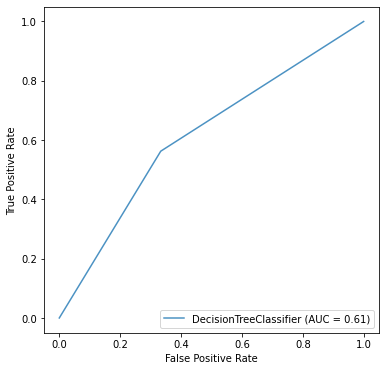

In [246]:
plt.rcParams['figure.figsize'] = (6,6)
ax = plt.gca()
rfc_disp = plot_roc_curve(dt, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

# Random Forest

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [218]:
yhat = model.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1])

In [219]:
acc = accuracy_score(y_test, yhat)
acc = acc*100
print('Accuracy: %.3f' % acc)

Accuracy: 80.645


In [220]:
confusion_matrix(y_test,yhat)

array([[ 9,  6],
       [ 0, 16]])

In [221]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.73      1.00      0.84        16

    accuracy                           0.81        31
   macro avg       0.86      0.80      0.80        31
weighted avg       0.86      0.81      0.80        31



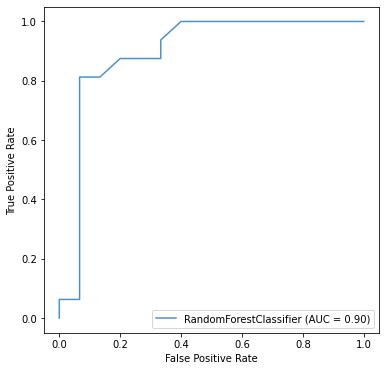

In [222]:
ax = plt.gca()
rfc_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

# k-nn

In [223]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [224]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [225]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [226]:
y_pred = classifier.predict(X_test)

In [227]:
accuracy_score(y_test, y_pred)
acc2 = accuracy_score(y_test, y_pred)
acc2 = acc2*100
print('Accuracy: %.3f' % acc2)

Accuracy: 74.194


In [228]:
confusion_matrix(y_test,y_pred)

array([[ 8,  7],
       [ 1, 15]])

In [229]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.68      0.94      0.79        16

    accuracy                           0.74        31
   macro avg       0.79      0.74      0.73        31
weighted avg       0.78      0.74      0.73        31



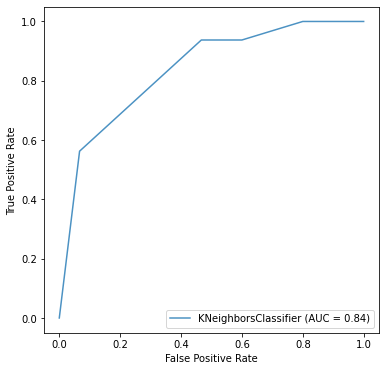

In [230]:
ax = plt.gca()
rfc_disp = plot_roc_curve(classifier, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

# Xgboost

In [231]:
from xgboost import XGBClassifier

In [232]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [233]:
y_pred_xgb = xgb.predict(X_test)

In [234]:
accuracy_score(y_test, y_pred_xgb)
acc5 = accuracy_score(y_test, y_pred_xgb)
acc5 = acc5*100
print('Accuracy: %.3f' % acc5)

Accuracy: 83.871


In [235]:
confusion_matrix(y_test,y_pred_xgb)

array([[10,  5],
       [ 0, 16]])

In [236]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.76      1.00      0.86        16

    accuracy                           0.84        31
   macro avg       0.88      0.83      0.83        31
weighted avg       0.88      0.84      0.83        31



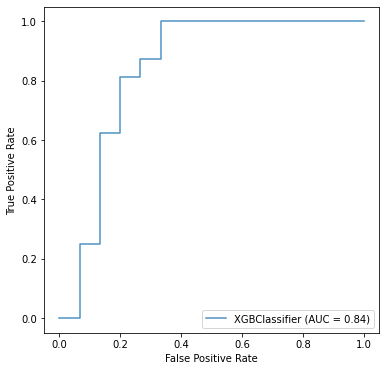

In [237]:
ax = plt.gca()
rfc_disp = plot_roc_curve(xgb, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

# Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
lr = LogisticRegression(random_state = 0)

In [240]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
y_pred_lr = lr.predict(X_test)

In [242]:
accuracy_score(y_test, y_pred_lr)
acc4 = accuracy_score(y_test, y_pred_lr)
acc4 = acc4*100
print('Accuracy: %.3f' % acc4)

Accuracy: 83.871


In [243]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  5],
       [ 0, 16]])

In [244]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.76      1.00      0.86        16

    accuracy                           0.84        31
   macro avg       0.88      0.83      0.83        31
weighted avg       0.88      0.84      0.83        31



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


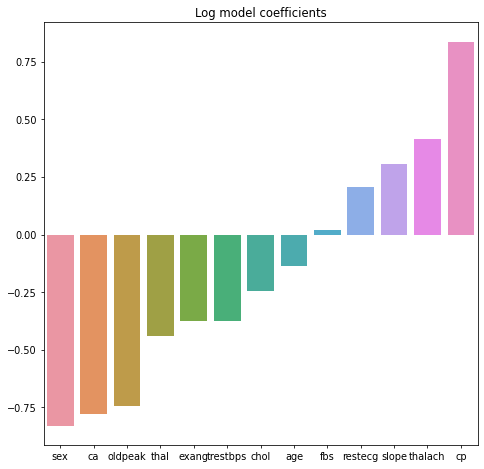

In [264]:
# Creating a visualization of the coefficients by using a barplot of their values
X = heart.drop('target',axis=1)
coefs = pd.Series(index=X.columns,data=lr.coef_[0])
coefs = coefs.sort_values()

plt.figure(figsize=(8,8), dpi = 70)
sns.barplot(coefs.index,coefs.values)
plt.title('Log model coefficients')
plt.show()

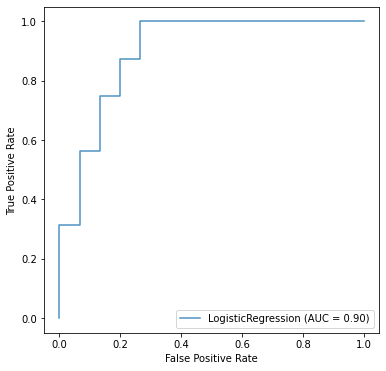

In [245]:
ax = plt.gca()
rfc_disp = plot_roc_curve(lr, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()